# Telecom Churn Case Study

In [251]:
# Importing all required packages
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn import metrics

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [252]:
# Loading data
df=pd.read_csv("telecom_churn_data.csv")

In [253]:
# Checking shape
df.shape

(99999, 226)

In [254]:
# Checking data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [255]:
# Checking datatypes
df.info

<bound method DataFrame.info of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
5         7000286308        109             0.0             0.0   
6         7001051193        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
9         7001864400        109             0.0             0.0   
10        7000471350        109             0.0             0.0   
11        7002006969        109             0.0             0.0   
12        7001419799        109             0.0             0.0   
13        7002191713        10

In [256]:
# Percentiles
df.describe(percentiles=[0.05,0.25,0.75,0.95,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
5%,7.000122e+09,109.0,0.0,0.0,0.0,1.500000,0.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
95%,7.002291e+09,109.0,0.0,0.0,0.0,829.488200,828.357200,833.303300,805.107200,612.407500,...,0.000000,1.000000,1.000000,1.000000,1.000000,3110.000000,465.213000,450.705000,400.178000,0.500000
99%,7.002387e+09,109.0,0.0,0.0,0.0,1410.792540,1428.685880,1455.539960,1402.445660,1431.760500,...,2.000000,1.000000,1.000000,1.000000,1.000000,3651.000000,1240.063600,1278.158000,1187.785200,86.554000


In [257]:
# Checking duplicates
df.duplicated().sum()

0

In [258]:
# Column names
df.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [259]:
# Checking data types
df.dtypes

mobile_number             int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
last_date_of_month_9     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
roam_og_mou_9           float64
loc_og_t2t_mou_6        float64
                         ...   
arpu_2g_

In [260]:
# Remove date columns , they are not signficant for the analysis

date_columns = df.select_dtypes(include=['object'])
df.drop(columns=date_columns,inplace=True)

In [261]:
# Checking null values
df.isnull().sum()

mobile_number           0
circle_id               0
loc_og_t2o_mou       1018
std_og_t2o_mou       1018
loc_ic_t2o_mou       1018
arpu_6                  0
arpu_7                  0
arpu_8                  0
arpu_9                  0
onnet_mou_6          3937
onnet_mou_7          3859
onnet_mou_8          5378
onnet_mou_9          7745
offnet_mou_6         3937
offnet_mou_7         3859
offnet_mou_8         5378
offnet_mou_9         7745
roam_ic_mou_6        3937
roam_ic_mou_7        3859
roam_ic_mou_8        5378
roam_ic_mou_9        7745
roam_og_mou_6        3937
roam_og_mou_7        3859
roam_og_mou_8        5378
roam_og_mou_9        7745
loc_og_t2t_mou_6     3937
loc_og_t2t_mou_7     3859
loc_og_t2t_mou_8     5378
loc_og_t2t_mou_9     7745
loc_og_t2m_mou_6     3937
                    ...  
arpu_2g_9           74077
night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
monthly_2g_6            0
monthly_2g_7            0
monthly_2g_8

### Treating Null Values

In [262]:
# Checking on null values percentage wise
df_null = (df.isnull().sum() / len(df)) * 100
df_null = df_null.drop(df_null[df_null == 0].index).sort_values(ascending=False)
df_null

count_rech_3g_6       74.846748
av_rech_amt_data_6    74.846748
fb_user_6             74.846748
total_rech_data_6     74.846748
count_rech_2g_6       74.846748
night_pck_user_6      74.846748
arpu_3g_6             74.846748
max_rech_data_6       74.846748
arpu_2g_6             74.846748
max_rech_data_7       74.428744
av_rech_amt_data_7    74.428744
arpu_3g_7             74.428744
count_rech_2g_7       74.428744
count_rech_3g_7       74.428744
night_pck_user_7      74.428744
total_rech_data_7     74.428744
fb_user_7             74.428744
arpu_2g_7             74.428744
max_rech_data_9       74.077741
total_rech_data_9     74.077741
count_rech_2g_9       74.077741
fb_user_9             74.077741
count_rech_3g_9       74.077741
night_pck_user_9      74.077741
av_rech_amt_data_9    74.077741
arpu_2g_9             74.077741
arpu_3g_9             74.077741
count_rech_3g_8       73.660737
arpu_2g_8             73.660737
fb_user_8             73.660737
                        ...    
loc_ic_t

In [263]:
# Number of columns which has null values
df_null.shape

(155,)

Text(0.5,1,'Percent missing data by feature')

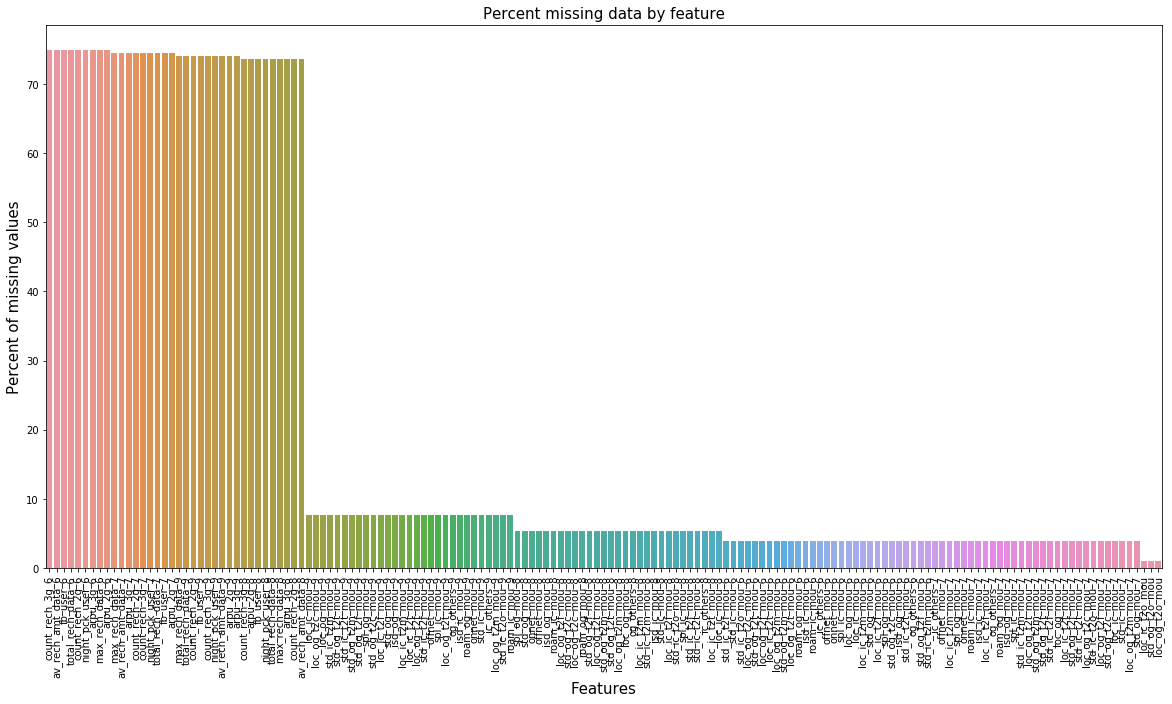

In [264]:
# Plotting a graph between null value percentage and features in original data which have more than 30 null values
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation='90')
sns.barplot(x=df_null.index, y=df_null)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [265]:
# Impute 0 to all columns except special pack i.e. fb_user, night_pck_user, 

all_columns = df.columns
col_special_pack = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

columns =  [columns for columns in all_columns if columns not in col_special_pack]

for col in columns:
    df[col]  = df[col].fillna(0)
    

In [266]:
# Checking on null values percentage wise
df_null = (df.isnull().sum() / len(df)) * 100
df_null = df_null.drop(df_null[df_null == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_null})
missing_data = missing_data.reset_index()
missing_data.head()

,index,Missing Ratio
0,fb_user_6,74.846748
1,night_pck_user_6,74.846748
2,fb_user_7,74.428744
3,night_pck_user_7,74.428744
4,fb_user_9,74.077741


In [267]:
# Impute the categorical data with mode value

columns = missing_data.loc[missing_data["Missing Ratio"] != 0 ]['index']   # Extract the column names from null_df dataframe

for col in columns:
     df[col] = df[col].fillna(df[col].mode()[0])

In [268]:
# Checking on null values percentage wise
df_null = (df.isnull().sum() / len(df)) * 100
df_null = df_null.drop(df_null[df_null == 0].index).sort_values(ascending=False)
df_null

Series([], dtype: float64)

### Finding High Value Customer

In [269]:
df['total_rech_6']=df['total_rech_amt_6']+df['total_rech_data_6']
df['total_rech_7']=df['total_rech_amt_7']+df['total_rech_data_7']
# Average recharge amount of good months
df['Avg_rech_amnt_6_7']=(df['total_rech_6']+df['total_rech_7'])/2

In [270]:
# High value customers whose recharge amount is greater than or equal to 70th percentile of avg recharge amount of good months
df_hvc=df[(df['Avg_rech_amnt_6_7']>=df['Avg_rech_amnt_6_7'].quantile(0.70))]

In [271]:
# Shape of the new dataframe 
df_hvc.shape

(30019, 217)

### Derived Column
###### Created the new column for the ratio of reacharge amount for action month and avg reacharge amount of good months

In [272]:
# Ratio of recharge amount
df_hvc['ratio_rech_amnt_8_avg_6&7']=df_hvc['total_rech_amt_8']/df_hvc['Avg_rech_amnt_6_7']

In [273]:
# Checking shape after derived column
df_hvc.shape

(30019, 218)

### Taging Churn based on the 9th month usage

In [274]:
# Creating churn column
df_hvc['Churn']=0

In [275]:
# Tagging churn who did not use services in 9th month
df_hvc['Churn'][(df_hvc['total_ic_mou_9'] ==0) & (df_hvc['total_og_mou_9'] ==0) & (df_hvc['vol_2g_mb_9'] ==0) & (df_hvc['vol_3g_mb_9']==0)]=1

In [276]:
# Checking data
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,Avg_rech_amnt_6_7,ratio_rech_amnt_8_avg_6&7,Churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,802,57.74,19.38,18.74,0.0,1580.0,790.0,1185.0,3.070042,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,315,21.03,910.65,122.16,0.0,437.0,603.0,520.0,0.230769,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,2607,0.00,0.00,0.00,0.0,507.0,253.0,380.0,1.886842,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,511,0.00,2.45,21.89,0.0,570.0,348.0,459.0,0.348584,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,667,0.00,0.00,0.00,0.0,816.0,0.0,408.0,0.073529,0


##### calculating churn rate

In [277]:
df_hvc['Churn'].sum()/len(df_hvc.index)

0.08627869016289683

In [278]:
# Checking null values
df_hvc.isnull().sum()

mobile_number                0
circle_id                    0
loc_og_t2o_mou               0
std_og_t2o_mou               0
loc_ic_t2o_mou               0
arpu_6                       0
arpu_7                       0
arpu_8                       0
arpu_9                       0
onnet_mou_6                  0
onnet_mou_7                  0
onnet_mou_8                  0
onnet_mou_9                  0
offnet_mou_6                 0
offnet_mou_7                 0
offnet_mou_8                 0
offnet_mou_9                 0
roam_ic_mou_6                0
roam_ic_mou_7                0
roam_ic_mou_8                0
roam_ic_mou_9                0
roam_og_mou_6                0
roam_og_mou_7                0
roam_og_mou_8                0
roam_og_mou_9                0
loc_og_t2t_mou_6             0
loc_og_t2t_mou_7             0
loc_og_t2t_mou_8             0
loc_og_t2t_mou_9             0
loc_og_t2m_mou_6             0
                            ..
monthly_2g_6                 0
monthly_

#### Creating new dataframe for the columns 9th month

In [279]:
s=[]
s.append('mobile_number')
for i in df_hvc.columns.values:
   if "_9" in i:
       s.append(i)
df_9=df_hvc[s]

In [280]:
# Checking data of 9th month data
df_9.head()

,mobile_number,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,...,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9
7,7000701601,500.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0
8,7001524846,166.787,33.46,108.71,0.00,0.00,26.13,34.58,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0
13,7002191713,322.732,244.81,214.06,136.78,12.78,6.14,108.24,5.29,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0
16,7000875565,206.490,31.34,224.39,0.00,0.00,26.88,201.49,4.66,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0
17,7000187447,257.583,558.51,87.89,0.00,17.98,36.41,9.38,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1.0


##### Dropping the all columns for the 9 month from the high valued customers dataframe

In [281]:
df_hvc=df_hvc.drop(s, axis=1)

In [282]:
# Checking data after dropping 9th month columns
df_hvc.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,Avg_rech_amnt_6_7,ratio_rech_amnt_8_avg_6&7,Churn
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,802,57.74,19.38,18.74,0.0,1580.0,790.0,1185.0,3.070042,1
8,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,0.0,437.0,603.0,520.0,0.230769,0
13,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,0.0,507.0,253.0,380.0,1.886842,0
16,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,0.0,570.0,348.0,459.0,0.348584,0
17,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,0.0,816.0,0.0,408.0,0.073529,0


In [283]:
## Finding the columns which has only one unique value
s=[]
for i in list(df_hvc.columns):
    if len(df_hvc[i].unique())==1:
        print(i)
        s.append(i)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [284]:
### Dropping columns which has only one value in entire column which are not useful to analysis
df_hvc=df_hvc.drop(s,axis=1)

In [285]:
# Checking data after dropping unnecessary columns
df_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,Avg_rech_amnt_6_7,ratio_rech_amnt_8_avg_6&7,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802,57.74,19.38,18.74,0.0,1580.0,790.0,1185.0,3.070042,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315,21.03,910.65,122.16,0.0,437.0,603.0,520.0,0.230769,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,2607,0.00,0.00,0.00,0.0,507.0,253.0,380.0,1.886842,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,511,0.00,2.45,21.89,0.0,570.0,348.0,459.0,0.348584,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,667,0.00,0.00,0.00,0.0,816.0,0.0,408.0,0.073529,0


## EDA

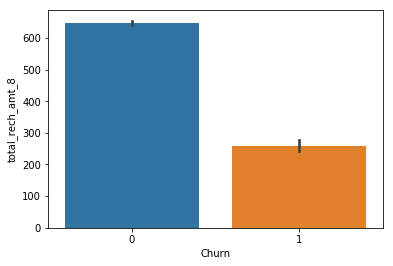

In [286]:
# factor plot to see churn rate for recharge amount of 8th month
sns.barplot(x='Churn',y = "total_rech_amt_8", data = df_hvc, estimator = np.mean)

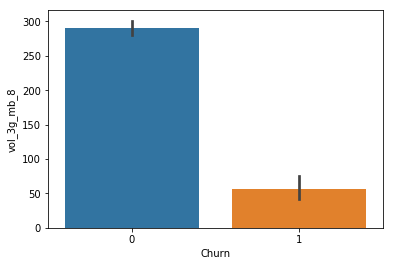

In [353]:
# factor plot to see churn rate for data usage of 8th month
sns.barplot(x='Churn',y = "vol_3g_mb_8", data = df_hvc, estimator = np.mean)

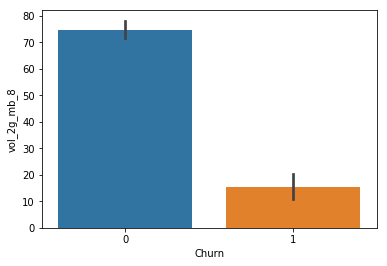

In [354]:
# factor plot to see churn rate for data usage of 8th month
sns.barplot(x='Churn',y = "vol_2g_mb_8", data = df_hvc, estimator = np.mean)

#### From above plots it is observed that mean total reacharge amount and usage of 3g and 2g data for the 8 month is very low for the customer who have churned

### PCA

In [287]:
# Pop the target column 'churn'
y=df_hvc['Churn']
X = df_hvc.drop(['Churn'],axis=1)

In [288]:
# Perform column decomposition using PCA
from sklearn.decomposition import PCA
PCA = PCA(svd_solver='randomized',random_state=42)

PCA.fit_transform(df_hvc)

array([[ 1.22818100e+03,  1.23168033e+03,  1.79756434e+03, ...,
        -3.67984558e-12,  1.02893070e-12,  4.15243478e-13],
       [-1.06337180e+03, -1.84290957e+02, -8.45952474e+02, ...,
         1.21904661e-12, -2.76802494e-13, -1.69451877e-12],
       [-3.10753798e+02, -6.72413690e+02,  6.47350651e+02, ...,
        -1.13464802e-12, -1.55571820e-12, -2.24742138e-12],
       ...,
       [ 7.64345746e+02,  1.33661576e+03,  1.51899683e+03, ...,
        -1.64201233e-13, -1.54336282e-13,  1.57082405e-13],
       [-9.20543746e+02, -9.98076798e+01,  1.43113876e+02, ...,
         3.03779224e-14,  5.24303908e-14,  6.19125980e-14],
       [-1.89028182e+03,  2.83906819e+03, -2.05309961e+03, ...,
         2.47344495e-14,  1.35124645e-13, -1.60239159e-14]])

In [289]:
# check the components data 
pca_df = pd.DataFrame({'PC1':PCA.components_[0],'PC2':PCA.components_[1],'feature':df_hvc.columns})

pca_df

,PC1,PC2,feature
0,1.406761e-01,0.115240,arpu_6
1,1.711969e-01,0.127668,arpu_7
2,1.688064e-01,0.131298,arpu_8
3,1.271271e-01,-0.047592,onnet_mou_6
4,1.547092e-01,-0.052209,onnet_mou_7
5,1.462632e-01,-0.039873,onnet_mou_8
6,1.466720e-01,-0.013014,offnet_mou_6
7,1.743401e-01,-0.016490,offnet_mou_7
8,1.609658e-01,-0.003963,offnet_mou_8
9,1.423785e-03,0.002073,roam_ic_mou_6


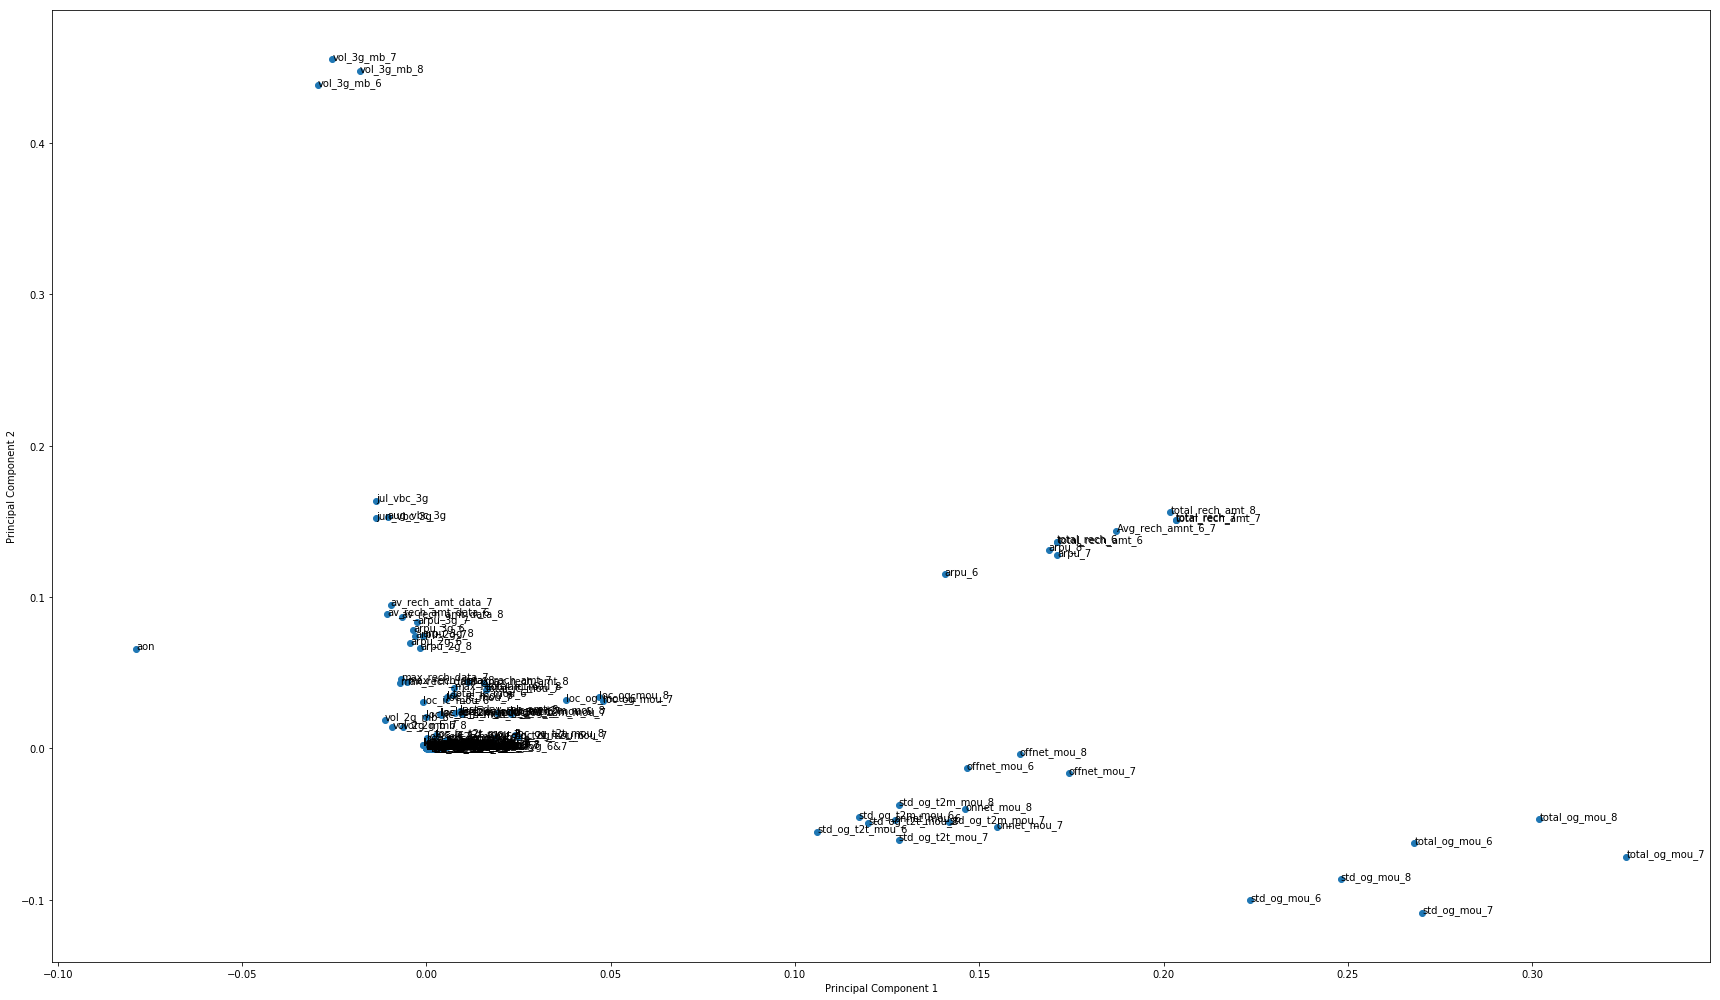

In [290]:
# Scatterplot the principle components to get the direction

%matplotlib inline
fig = plt.figure(figsize = (24,14))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

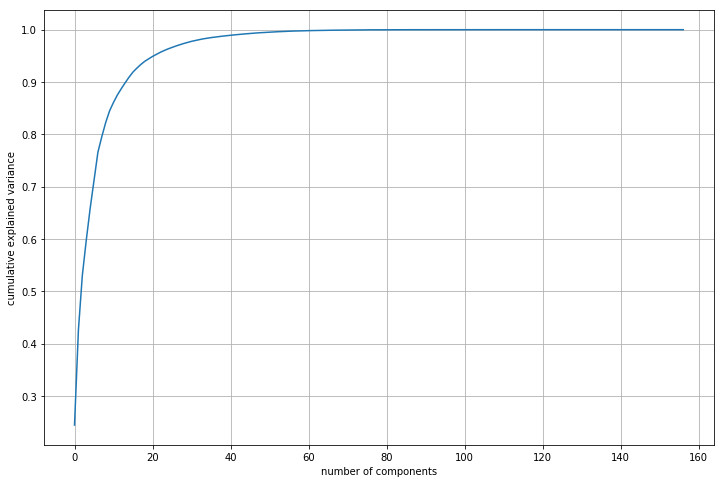

In [291]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(PCA.explained_variance_ratio_),)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# plt.yticks('5')
#plt.yscale(0.01)
plt.grid(True)
plt.show()

In [292]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
pca_final = IncrementalPCA(n_components=15)

df_hvc_pca = pca_final.fit_transform(df_hvc)
df_hvc_pca = pd.DataFrame(df_hvc_pca)

df_hvc_pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']

In [293]:
## Adding churn back to the pca dataset
y = y.reset_index()
y.drop(columns='index',inplace=True)
df_hvc_pca['Churn'] = y

In [294]:
# Review dataframe 'df_hvc_pca'
df_hvc_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,Churn
0,1228.088871,1231.050952,1796.400722,-1465.658153,-718.540365,-1816.542838,38.057417,3.057534,-1414.747627,-488.928364,446.138430,36.606340,-209.819275,-277.844890,405.618062,1
1,-1063.420849,-184.269900,-845.992848,-370.202287,-511.460090,-206.904050,-459.564293,-434.172069,543.144812,-103.211969,-777.293926,71.732652,-107.988022,-151.435750,143.526999,0
2,-310.651651,-672.440979,647.208645,1056.370036,289.541212,371.059478,640.569444,524.032157,-1060.823111,-340.741690,-323.529481,-301.654363,216.750716,-107.870117,-17.367905,0
3,-1279.974509,-616.253561,-105.538688,-589.505819,-248.475094,-62.292182,-597.706168,10.393215,-61.279110,72.398309,67.202268,-120.579378,-168.605562,-55.091435,-98.570283,0
4,-1055.926535,-1047.330209,-976.561196,-318.331384,-1433.556136,998.289125,282.421558,-99.523014,-582.840025,-426.448360,-199.214687,-266.143029,158.853375,-40.722515,862.650883,0


In [295]:
# Shape of the pca dataframe
df_hvc_pca.shape

(30019, 16)

### Start Model Building process

In [296]:
# divide the data target variable 
y = df_hvc_pca.pop('Churn')
X = df_hvc_pca

In [297]:
# Divide the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression

In [298]:
# Logistic regression with balanced class
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')  # to remedy the class imbalance in dataset

In [299]:
# Model fitting 
model_reg=logreg.fit(X_train,y_train)

In [300]:
# Predicting probability
pred_probs_test = model_reg.predict_proba(X_test)[:,1]

In [301]:
# Loading probability into new dataframe
y_pred_df = pd.DataFrame(pred_probs_test)
y_pred_df.head()

,0
0,0.458769
1,0.238392
2,0.381451
3,0.062832
4,0.824802


In [302]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
25334,0
26459,0
24873,0
23421,0
4605,1


In [303]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,25334,0,0.458769
1,26459,0,0.238392
2,24873,0,0.381451
3,23421,0,0.062832
4,4605,1,0.824802


In [304]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,25334,0,0.458769,0
1,26459,0,0.238392,0
2,24873,0,0.381451,0
3,23421,0,0.062832,0
4,4605,1,0.824802,1


In [305]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

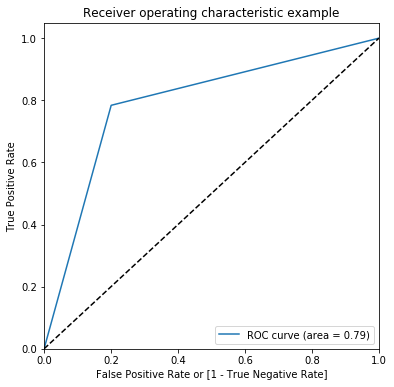

(array([0.        , 0.20043972, 1.        ]),
 array([0.        , 0.78388278, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [306]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [307]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,25334,0,0.458769,0,1,1,1,1,1,0,0,0,0,0
1,26459,0,0.238392,0,1,1,1,0,0,0,0,0,0,0
2,24873,0,0.381451,0,1,1,1,1,0,0,0,0,0,0
3,23421,0,0.062832,0,1,0,0,0,0,0,0,0,0,0
4,4605,1,0.824802,1,1,1,1,1,1,1,1,1,1,0


In [308]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090939  1.000000  0.000000
0.1   0.1  0.306684  0.968254  0.240503
0.2   0.2  0.465467  0.931624  0.418835
0.3   0.3  0.606262  0.894994  0.577379
0.4   0.4  0.713080  0.835165  0.700867
0.5   0.5  0.798135  0.783883  0.799560
0.6   0.6  0.857873  0.694750  0.874191
0.7   0.7  0.891184  0.583639  0.921949
0.8   0.8  0.904175  0.402930  0.954318
0.9   0.9  0.908394  0.172161  0.982045


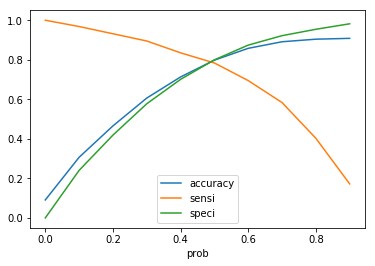

In [309]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Optimum cut-off probability is 0.5 based on above graph

In [310]:
# Tagging churn with cut-off probability
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,25334,0,0.458769,0,1,1,1,1,1,0,0,0,0,0,0
1,26459,0,0.238392,0,1,1,1,0,0,0,0,0,0,0,0
2,24873,0,0.381451,0,1,1,1,1,0,0,0,0,0,0,0
3,23421,0,0.062832,0,1,0,0,0,0,0,0,0,0,0,0
4,4605,1,0.824802,1,1,1,1,1,1,1,1,1,1,0,1


In [311]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7981345769487008

In [312]:
# Confusion mattrics
confusion1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion1

array([[6546, 1641],
       [ 177,  642]], dtype=int64)

In [313]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [314]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7838827838827839

In [315]:
# Let us calculate specificity
TN / float(TN+FP)

0.7995602784902894

In [316]:
# Precision
TP / (TP + FP)

0.2812089356110381

In [317]:
# Recall
TP / (TP + FN)

0.7838827838827839

### Decision Tree

In [318]:
from sklearn.tree import DecisionTreeClassifier

dt_defealut = DecisionTreeClassifier(max_depth=5)
dt_defealut.fit(X_train,y_train)

y_test_default_decision_tree = dt_defealut.predict(X_test)

confusion2=confusion_matrix(y_test,y_test_default_decision_tree)
confusion2

array([[8083,  104],
       [ 709,  110]], dtype=int64)

In [319]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [320]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test,y_test_default_decision_tree)

0.9097268487674883

In [321]:
# Let's see the sensitivity
TP / float(TP+FN)

0.1343101343101343

In [322]:
# Let us calculate specificity
TN / float(TN+FP)

0.9872969341639184

In [324]:
# Grid Search to choose best hyperparameters
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(50, 300, 50),
    'min_samples_split': range(50, 300, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, n_jobs=-1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(5, 30, 5), 'min_samples_leaf': range(50, 300, 50), 'min_samples_split': range(50, 300, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [325]:
# Best parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [326]:
# Best score
grid_search.best_score_

0.8074525293865702

In [327]:
#Grid results
cv_results = pd.DataFrame(grid_search.cv_results_)

In [328]:
#Grid results
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.238424,0.001592,0.801171,0.808131,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",68,...,0.799619,0.812742,0.786530,0.793052,0.790338,0.791565,0.015017,4.872767e-04,0.012404,0.015536
1,0.312082,0.002595,0.801171,0.808131,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",68,...,0.799619,0.812742,0.786530,0.793052,0.790338,0.791565,0.053242,1.848003e-03,0.012404,0.015536
2,0.353671,0.001197,0.800695,0.807524,entropy,5,50,150,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",75,...,0.799619,0.812742,0.786530,0.793052,0.787958,0.788531,0.008647,3.984454e-04,0.012848,0.016216
3,0.361252,0.001198,0.800029,0.806882,entropy,5,50,200,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",96,...,0.796287,0.809529,0.786530,0.793052,0.787958,0.788531,0.006699,3.985173e-04,0.012972,0.016059
4,0.371421,0.001197,0.797411,0.804014,entropy,5,50,250,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",110,...,0.796287,0.809529,0.786530,0.793052,0.783198,0.781928,0.004117,3.989459e-04,0.013181,0.017668
5,0.354466,0.001197,0.798173,0.804645,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",106,...,0.792242,0.804711,0.787958,0.795372,0.787958,0.788531,0.007479,3.988505e-04,0.011238,0.013235
6,0.362239,0.001596,0.798173,0.804645,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",106,...,0.792242,0.804711,0.787958,0.795372,0.787958,0.788531,0.015604,4.885777e-04,0.011238,0.013235
7,0.358851,0.001596,0.798173,0.804645,entropy,5,100,150,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",106,...,0.792242,0.804711,0.787958,0.795372,0.787958,0.788531,0.011913,4.887530e-04,0.011238,0.013235
8,0.385291,0.001197,0.798173,0.804645,entropy,5,100,200,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",106,...,0.792242,0.804711,0.787958,0.795372,0.787958,0.788531,0.034256,3.989220e-04,0.011238,0.013235
9,0.374413,0.001796,0.794936,0.800921,entropy,5,100,250,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",120,...,0.792242,0.804711,0.782960,0.789543,0.783198,0.781928,0.022722,7.463531e-04,0.012295,0.015577


In [329]:
# Importing required packages
from sklearn.metrics import confusion_matrix,classification_report

In [330]:
# DecisionTree with best parameters
dec_gini = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9},criterion="gini",random_state=100,max_depth=5,min_samples_leaf=50,
min_samples_split=50)

In [331]:
# DecisionnTree fit
dec_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [332]:
# Making predictions
y_pred_dec = dec_gini.predict(X_test)

In [333]:
# Classification report
print(classification_report(y_test,y_pred_dec))

             precision    recall  f1-score   support

          0       0.96      0.81      0.88      8187
          1       0.26      0.67      0.37       819

avg / total       0.90      0.79      0.83      9006



In [334]:
confusion3=confusion_matrix(y_test,y_pred_dec)
confusion3

array([[6591, 1596],
       [ 271,  548]], dtype=int64)

In [335]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [336]:
# Let's see the sensitivity
TP / float(TP+FN)

0.6691086691086691

In [337]:
# Let us calculate specificity
TN / float(TN+FP)

0.8050567973616709

In [338]:
# Precision
TP / (TP + FP)

0.2555970149253731

In [339]:
# Recall
TP / (TP + FN)

0.6691086691086691

### Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [341]:
# Grid serach to choose best parameters for random forest
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [342]:
# Best parameters
grid_search.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [343]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300,class_weight={0:0.1, 1: 0.9})



In [344]:
# RFC fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=8, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [345]:
# Making predictions
y_test_predictions = rfc.predict(X_test)

In [346]:
# Classification report
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_test_predictions))

             precision    recall  f1-score   support

          0       0.97      0.86      0.91      8187
          1       0.33      0.71      0.45       819

avg / total       0.91      0.84      0.87      9006



In [347]:
confusion4=confusion_matrix(y_test,y_test_predictions)
confusion4

array([[7026, 1161],
       [ 239,  580]], dtype=int64)

In [348]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [349]:
# Let's see the sensitivity
TP / float(TP+FN)

0.7081807081807082

In [350]:
# Let us calculate specificity
TN / float(TN+FP)

0.8581898131183584

In [351]:
# Precision
TP / (TP + FP)

0.3331418724870764

In [352]:
# Recall
TP / (TP + FN)

0.7081807081807082

<B> Ouput:  Logistic Regression Recall value is 0.78 more compared to Decision tree Recall value 0.67 and Random Forest Recall Value 0.71 .  Recall value is ratio of predicted churn to actual churn (who are going to churn) - This value should be high compared to precision value for better result in this business requireemnt.

Choose  'Logistic Regression' model for better results.  </B>

### Finding important vairables using Logistic Regression

In [151]:
# Seprating the X and Y columns
X=df_hvc.drop(['Churn'],axis=1)
y=df_hvc['Churn']

In [152]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [153]:
# Logistic regression with balanced class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')  # to remedy the class imbalance in dataset

In [159]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output

In [160]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [162]:
col = X_train.columns[rfe.support_]

In [163]:
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'monthly_2g_8'],
      dtype='object')

In [164]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4788.1
Date:                Mon, 13 May 2019   Deviance:                       9576.1
Time:                        20:36:25   Pearson chi2:                 4.50e+15
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7411      0.037    -20.249      0.000      -0.813      -0.669
loc_ic_t2t_mou_8     7.9549      0.987      8.059      0.000       6.020       9.889
loc_ic_t2m_mou_8     7.9479      0.987      8.052      0.000       6.013       9.883
loc_ic_t2f_mou_8     7.9517      0.987      8.056      0.000       6.017       9.886
std_ic_t2t_mou_8     0.0103      0.009      1.209      0.227      -0.006       0.027
std_ic_t2m_mou_8     0.0133      0.008      1.567      0.117      -0.003       0.030
std_ic_mou_8         7.9437      0.987      8.048      0.000       6.009       9.878
total_ic_mou_8      -7.9616      0.987     -8.067      0.000      -9.896      -6.027
isd_ic_mou_8         7.9613      0.987      8.066      0.000       6.027       9.896
ic_others_8          7.9586      0.987      8.061      0.000       6.024       9.894
monthly_2g_8        -1.7674      0.206     -8.597      0.000      -2.170      -1.364
====================================================================================
"""

In [165]:
X_train_sm=X_train[col]
X_train_sm=X_train_sm.drop('std_ic_t2t_mou_8',axis=1)

In [166]:
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20997
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4788.9
Date:                Mon, 13 May 2019   Deviance:                       9577.9
Time:                        20:39:03   Pearson chi2:                 4.50e+15
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7403      0.037    -20.227      0.000      -0.812      -0.669
loc_ic_t2t_mou_8     7.9499      0.988      8.048      0.000       6.014       9.886
loc_ic_t2m_mou_8     7.9429      0.988      8.041      0.000       6.007       9.879
loc_ic_t2f_mou_8     7.9464      0.988      8.044      0.000       6.010       9.883
std_ic_t2m_mou_8     0.0035      0.002      1.672      0.095      -0.001       0.008
std_ic_mou_8         7.9484      0.988      8.046      0.000       6.012       9.885
total_ic_mou_8      -7.9567      0.988     -8.055      0.000      -9.893      -6.021
isd_ic_mou_8         7.9563      0.988      8.055      0.000       6.020       9.892
ic_others_8          7.9536      0.988      8.050      0.000       6.017       9.890
monthly_2g_8        -1.7704      0.206     -8.611      0.000      -2.173      -1.367
====================================================================================
"""

In [167]:
X_train_sm=X_train_sm.drop('std_ic_t2m_mou_8',axis=1)

In [168]:
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20998
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4790.4
Date:                Mon, 13 May 2019   Deviance:                       9580.8
Time:                        20:39:45   Pearson chi2:                 4.50e+15
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7416      0.037    -20.267      0.000      -0.813      -0.670
loc_ic_t2t_mou_8     7.9379      0.988      8.036      0.000       6.002       9.874
loc_ic_t2m_mou_8     7.9309      0.988      8.028      0.000       5.995       9.867
loc_ic_t2f_mou_8     7.9343      0.988      8.032      0.000       5.998       9.871
std_ic_mou_8         7.9387      0.988      8.036      0.000       6.003       9.875
total_ic_mou_8      -7.9447      0.988     -8.043      0.000      -9.881      -6.009
isd_ic_mou_8         7.9443      0.988      8.042      0.000       6.008       9.880
ic_others_8          7.9416      0.988      8.037      0.000       6.005       9.878
monthly_2g_8        -1.7700      0.206     -8.609      0.000      -2.173      -1.367
====================================================================================
"""

In [169]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_ic_mou_8,8767213.01
2,loc_ic_t2m_mou_8,3276434.15
1,loc_ic_t2t_mou_8,1682906.99
4,std_ic_mou_8,1249159.64
6,isd_ic_mou_8,338453.34
3,loc_ic_t2f_mou_8,136279.27
7,ic_others_8,14733.59
0,const,1.90
8,monthly_2g_8,1.01


In [171]:
X_train_sm=X_train_sm.drop('total_ic_mou_8',axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20999
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4889.4
Date:                Mon, 13 May 2019   Deviance:                       9778.7
Time:                        20:42:36   Pearson chi2:                 3.93e+10
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8588      0.036    -24.066      0.000      -0.929      -0.789
loc_ic_t2t_mou_8    -0.0071      0.001     -7.009      0.000      -0.009      -0.005
loc_ic_t2m_mou_8    -0.0146      0.001    -21.056      0.000      -0.016      -0.013
loc_ic_t2f_mou_8    -0.0105      0.003     -3.661      0.000      -0.016      -0.005
std_ic_mou_8        -0.0068      0.001     -8.583      0.000      -0.008      -0.005
isd_ic_mou_8        -0.0006      0.001     -0.804      0.422      -0.002       0.001
ic_others_8         -0.0079      0.010     -0.795      0.427      -0.028       0.012
monthly_2g_8        -1.7559      0.205     -8.564      0.000      -2.158      -1.354
====================================================================================
"""

In [172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.76
2,loc_ic_t2m_mou_8,1.11
3,loc_ic_t2f_mou_8,1.06
1,loc_ic_t2t_mou_8,1.05
5,isd_ic_mou_8,1.03
6,ic_others_8,1.02
4,std_ic_mou_8,1.01
7,monthly_2g_8,1.01


In [173]:
X_train_sm=X_train_sm.drop('ic_others_8',axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    21000
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4889.8
Date:                Mon, 13 May 2019   Deviance:                       9779.5
Time:                        20:43:10   Pearson chi2:                 4.17e+10
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8595      0.036    -24.092      0.000      -0.929      -0.790
loc_ic_t2t_mou_8    -0.0071      0.001     -7.014      0.000      -0.009      -0.005
loc_ic_t2m_mou_8    -0.0147      0.001    -21.136      0.000      -0.016      -0.013
loc_ic_t2f_mou_8    -0.0105      0.003     -3.660      0.000      -0.016      -0.005
std_ic_mou_8        -0.0069      0.001     -8.605      0.000      -0.008      -0.005
isd_ic_mou_8        -0.0008      0.001     -0.974      0.330      -0.002       0.001
monthly_2g_8        -1.7576      0.205     -8.572      0.000      -2.160      -1.356
====================================================================================
"""

In [174]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.76
2,loc_ic_t2m_mou_8,1.11
3,loc_ic_t2f_mou_8,1.06
1,loc_ic_t2t_mou_8,1.05
4,std_ic_mou_8,1.01
5,isd_ic_mou_8,1.01
6,monthly_2g_8,1.01


In [175]:
X_train_sm=X_train_sm.drop('isd_ic_mou_8',axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    21001
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4890.4
Date:                Mon, 13 May 2019   Deviance:                       9780.8
Time:                        20:43:40   Pearson chi2:                 4.40e+10
No. Iterations:                     8                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8611      0.036    -24.160      0.000      -0.931      -0.791
loc_ic_t2t_mou_8    -0.0071      0.001     -7.018      0.000      -0.009      -0.005
loc_ic_t2m_mou_8    -0.0147      0.001    -21.194      0.000      -0.016      -0.013
loc_ic_t2f_mou_8    -0.0105      0.003     -3.676      0.000      -0.016      -0.005
std_ic_mou_8        -0.0069      0.001     -8.699      0.000      -0.008      -0.005
monthly_2g_8        -1.7577      0.205     -8.573      0.000      -2.160      -1.356
====================================================================================
"""

In [176]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.75
2,loc_ic_t2m_mou_8,1.10
3,loc_ic_t2f_mou_8,1.06
1,loc_ic_t2t_mou_8,1.05
4,std_ic_mou_8,1.01
5,monthly_2g_8,1.01


### Above coloumns are effecting the churn rate
##### Local calls and std calls and 2g usage from the 8th month effecting the churn rate

###### Visually demontstrating the significance of columns

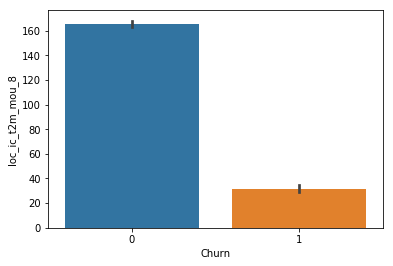

In [213]:
# factor plot to check the local calls for t2m 
sns.barplot(x='Churn',y = "loc_ic_t2m_mou_8", data = df_hvc, estimator = np.mean)

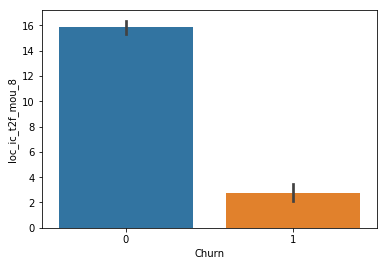

In [214]:
# factor plot to check the local calls for t2f 
sns.barplot(x='Churn',y = "loc_ic_t2f_mou_8", data = df_hvc, estimator = np.mean)

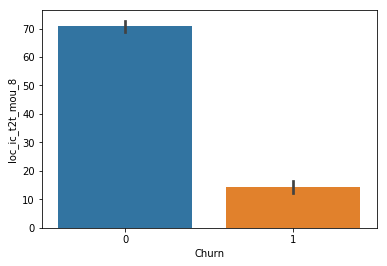

In [215]:
# factor plot to check the local calls usage for chunred customers
sns.barplot(x='Churn',y = "loc_ic_t2t_mou_8", data = df_hvc, estimator = np.mean)

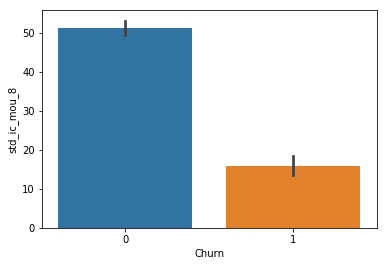

In [216]:
# factor plot to check mean std calls 
sns.barplot(x='Churn',y = "std_ic_mou_8", data = df_hvc, estimator = np.mean)

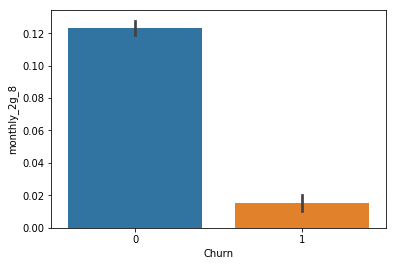

In [217]:
# factor plot to check mean monthly usage of 2g data
sns.barplot(x='Churn',y = "monthly_2g_8", data = df_hvc, estimator = np.mean)

#### From above plots it is observed that if customer usage rate of services like local call for T2T,T2F,T2M and Std and 2g data is goes down.then customer has more chances to churn

## Recommedations:

### Customers who makes less calls and use less data are having more chances to Churn
### So give some good offers to customers to attract more and keep them stay with us